In [33]:
import sympy as spy
#import libraries
import math
import time
import numpy as np
import scipy.optimize as opt
import scipy.stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve
from LinApp_FindSS import LinApp_FindSS


$\begin{aligned} F &=\frac{\alpha \overline{K}^{\alpha-1}}{K^{\alpha}-K} \\ G &=-\frac{\alpha \overline{K}^{\alpha-1}\left(\alpha+\overline{K}^{\alpha-1}\right)}{\overline{K}^{\alpha}-\overline{K}} \\ H &=\frac{\alpha^{2} \overline{K}^{2(\alpha-1)}}{\overline{K}^{\alpha}-\overline{K}} \\ L &=-\frac{\alpha \overline{K}^{2 \alpha-1}}{\overline{K}^{\alpha}-\overline{K}} \\ M &=\frac{\alpha^{2} \overline{K}^{2(\alpha-1)}}{K^{\alpha}-\overline{K}} \end{aligned}$


$\overline{K}=A^{\frac{1}{1-\alpha}}$

$P=\frac{-G \pm \sqrt{G^{2}-4 F H}}{2 F}$

$Q=-\frac{L N+M}{F N+F P+G}$


$K_{t+1}=\overline{K}+P\left(K_{t}-\overline{K}\right)+Q z_{t}$

# Q 1

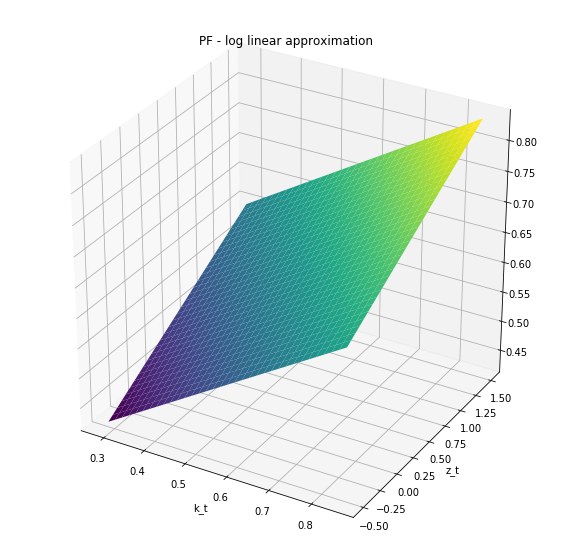

In [41]:
#Setting Parameters
alpha  = 0.40
beta = 0.98
rho = 0.95
A = alpha*beta

def uhlig_par():
    k_bar = A**(1/1-alpha)
    F = 1/((k_bar**alpha-1)-1)
    G = (alpha + k_bar)/(k_bar - k_bar**alpha)
    H = alpha/(1-k_bar**(1-alpha))
    L = k_bar/(k_bar - k_bar**alpha)
    M = 1/(1-k_bar**(1-alpha))
    N = rho
    return F,G,H,L,M,N

def P_root(P):
    F,G,H,L,M,N = uhlig_par()
    error = (F*P**2) + G*P + H
    return error

def uhlig_coeff():
    F,G,H,L,M,N = uhlig_par()
    P_guess = 0.5
    results = opt.root(P_root, P_guess, tol = 1e-10)
    P = results.x
    Q = -1*(L*N+M)/(F*N + F*P + G)
    return F,G,H,L,M,N,P,Q

F,G,H,L,M,N,P,Q = uhlig_coeff()
k_bar = A**(1/1-alpha)
k_mesh = np.linspace(k_bar*0.5, k_bar*1.5, 100)
z_mesh = np.linspace(-0.5, 1.5, 100)

x,y = np.meshgrid(k_mesh, z_mesh)
policy = np.empty((100,100))
for i in range(100):
    for j in range(100):
        policy[i,j] = (1-P)*k_bar + P*(k_mesh[i]) + Q*k_bar*z_mesh[j]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, policy, rstride = 3, cstride = 3, cmap='viridis')
plt.title('PF - log linear approximation')
plt.ylabel('z_t')
plt.xlabel('k_t')
plt.show()

# Q2

Now use k=log K


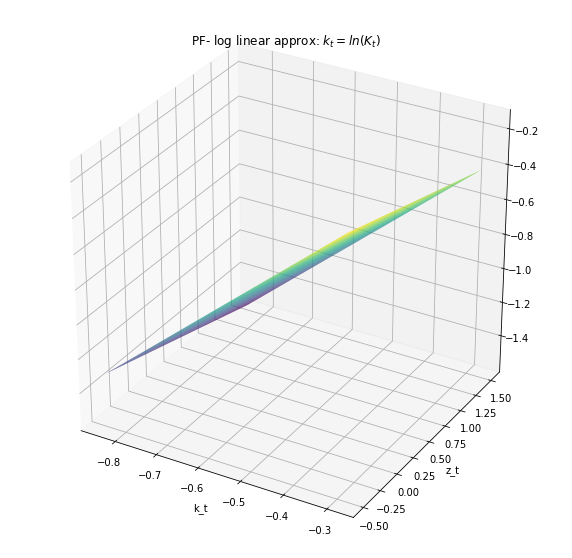

In [42]:
#Setting Parameters
alpha  = 0.40
beta = 0.98
rho = 0.95
A = alpha*beta

def uhlig_par():
    K_bar = A**(1/1-alpha)
    k_bar = np.log(K_bar)
    F = k_bar/(np.exp(alpha*k_bar)- np.exp(k_bar))
    G = k_bar*(alpha + np.exp((alpha-1)*k_bar))/(1- np.exp((alpha-1)*k_bar))
    H = (k_bar*alpha*np.exp(alpha*k_bar))/(np.exp(alpha*k_bar) - np.exp(k_bar))
    L = -(np.exp(k_bar))/(np.exp(alpha*k_bar) - np.exp(k_bar))
    M = (np.exp(alpha*k_bar))/(np.exp(alpha*k_bar)- np.exp(k_bar))
    N = rho
    return F,G,H,L,M,N 

def P_root(P):
    F,G,H,L,M,N = uhlig_params()
    error = (F*P**2) + G*P + H
    return error

def uhlig_coeff():
    F,G,H,L,M,N = uhlig_params()
    P_guess = 0.5
    results = opt.root(P_root, P_guess, tol = 1e-10)
    P = results.x
    Q = -1*(L*N+M)/(F*N + F*P + G)
    return F,G,H,L,M,N,P,Q

F,G,H,L,M,N,P,Q = uhlig_coeff()
K_bar = A**(1/1-alpha)
k_bar = np.log(K_bar)
k_mesh = np.linspace(k_bar*0.5, k_bar*1.5, 100)
z_mesh = np.linspace(-0.5, 1.5, 100)

x,y = np.meshgrid(k_mesh, z_mesh)
policy = np.empty((100,100))
for i in range(100):
    for j in range(100):
        policy[i,j] = (1-P)*k_bar + P*(k_mesh[i]) + Q*k_bar*z_mesh[j]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, policy, rstride = 3, cstride = 3, cmap='viridis')
plt.title('PF- log linear approx: $k_t = ln(K_t)$')
plt.ylabel('z_t')
plt.xlabel('k_t')
plt.show()

# Q 4 & 5

In [49]:
gamma  = 2.5
zeta = 1.5
beta = 0.98
alpha = 0.40
delta = 0.10
z_bar = 0
tau = 0.05
a = 0.5

def getA(z_bar, alpha):
    A = np.exp(z_bar*(1-alpha))
    return A

def getC(tau, w, r, delta, k, T, l):
    c = (1-tau)*(w*l + (r-delta)*k) + T
    return c

def getW(alpha, z_bar, k, l):
    A = getA(z_bar, alpha)
    w = (1-alpha)*A*(k/l)**alpha
    return w

def getR(alpha, z_bar, k, l):
    A = getA(z_bar, alpha)
    r = alpha*A*(l/k)**(1-alpha)
    return r

def getT(tau, w, r, delta, k, l):
    T = tau*(w*l + (r-delta)*k)
    return T

def getY(alpha, z_bar, k,l):
    A = getA(z_bar,alpha)
    Y = A*(k**alpha)*l**(1-alpha)
    return Y

def euler(klvec, *args):
    (alpha, z_bar, tau, delta, gamma, beta, a, zeta) = args
    k = klvec[0]
    l = klvec[1]
    r = getR(alpha, z_bar, k,l)
    w = getW(alpha, z_bar, k,l)
    T = getT(tau, w, r, delta, k,l)
    c = getC(tau, w, r, delta, k, T,l)
    error1 = c**(-gamma) - beta*((c**(-gamma))*((r- delta)*(1-tau)+1))
    error2 = c**(-gamma)*w*(1-tau)- a*(1-l)**(-zeta)  
    errors = np.array([error1, error2])
    return errors



def get_ss(alpha, z_bar, tau, delta, gamma, beta, a, zeta):
    klvec_init = np.array([0.5,0.5])
    eul_args = (alpha, z_bar, tau, delta, gamma, beta, a, zeta)
    results = opt.root(euler, klvec_init, args= (eul_args), tol = 1e-14)
    klvec_ss = results.x
    errors = results.fun
    k_ss = klvec_ss[0]
    l_ss = klvec_ss[1]
    Y = getY(alpha, z_bar, k_ss, l_ss)
    r = getR(alpha, z_bar, k_ss, l_ss)
    w = getW(alpha, z_bar, k_ss, l_ss)
    T = getT(tau, w, r, delta, k_ss, l_ss)
    C = getC(tau, w, r, delta, k_ss, T, l_ss)
    I = delta*k_ss
    return k_ss, C, r, w, l_ss, T, Y, I
ssvalues=get_ss(alpha, z_bar, tau, delta_p, gamma, beta, a, zeta)
print("Steady state values for k, c, r, w,l, t, y, i are:" +str(ssvalues))

Steady state values for k, c, r, w,l, t, y, i are:(4.22039860300467, 0.8603522811221754, 0.12158227712137488, 1.3272245180920441, 0.5799233650959326, 0.04301761405610877, 1.2828141812829428, 0.42246190016076746)


In [50]:
derivative = np.empty((8, 8))
epsilon = 1e-4

#Set slightly perturbed parameters
gamma_p  = gamma+epsilon
zeta_p = zeta + epsilon
beta_p = beta + epsilon
alpha_p = alpha + epsilon
delta_p = delta + epsilon
z_bar_p = z_bar + epsilon
tau_p = tau + epsilon
a_p = a + epsilon

# Start filling the matrix with perturbed steady states
derivative[0,:] = get_ss(alpha, z_bar, tau, delta_p, gamma, beta, a, zeta)
derivative[1,:] = get_ss(alpha, z_bar, tau_p, delta, gamma, beta, a, zeta)
derivative[2,:] = get_ss(alpha, z_bar_p, tau, delta, gamma, beta, a, zeta)
derivative[3,:] = get_ss(alpha_p, z_bar, tau, delta, gamma, beta, a, zeta)
derivative[4,:] = get_ss(alpha, z_bar, tau, delta, gamma_p, beta, a, zeta)
derivative[5,:] = get_ss(alpha, z_bar, tau, delta, gamma, beta, a, zeta_p)
derivative[6,:] = get_ss(alpha, z_bar, tau, delta, gamma, beta_p, a, zeta)
derivative[7,:] = get_ss(alpha, z_bar, tau, delta, gamma, beta, a_p, zeta)

#create another matrix with original values of steady states i.e with original parameters
matrix = np.empty((8,8))
for i in range(8):
    matrix[i,:] = get_ss(alpha, z_bar, tau, delta, gamma, beta, a, zeta)

#derivative is difference in steady state values/epsilon 
derivative = (derivative - matrix)/epsilon
derivative

array([[-4.83042378e+01, -3.50925032e+00,  1.00000000e+00,
        -7.28250259e+00,  1.31911929e+00, -1.75462516e-01,
        -4.11927550e+00, -6.10025176e-01],
       [-2.32335242e+00, -2.34406155e-01,  2.26153038e-02,
        -1.64806424e-01, -1.38930975e-01,  8.48959458e-01,
        -4.66741397e-01, -2.32335242e-01],
       [ 2.83835879e+00,  5.78189844e-01,  0.00000000e+00,
         1.32801917e+00, -1.90318105e-01,  2.89094922e-02,
         8.62025723e-01,  2.83835879e-01],
       [ 2.59941586e+01,  2.08592149e+00,  1.80411242e-12,
         4.39780036e+00, -7.69576204e-01,  1.04296074e-01,
         4.68533735e+00,  2.59941586e+00],
       [ 1.38696175e-01,  2.82532004e-02, -1.11022302e-12,
         6.66133815e-12,  1.90320705e-02,  1.41266002e-03,
         4.21228179e-02,  1.38696175e-02],
       [-8.01632142e-01, -1.63297031e-01, -2.35922393e-12,
         1.77635684e-11, -1.10001011e-01, -8.16485154e-03,
        -2.43460245e-01, -8.01632142e-02],
       [ 6.55108813e+01,  1.750679